# Late Fusion
## Modality 1: House characteristics

## Setup

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [2]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [3]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

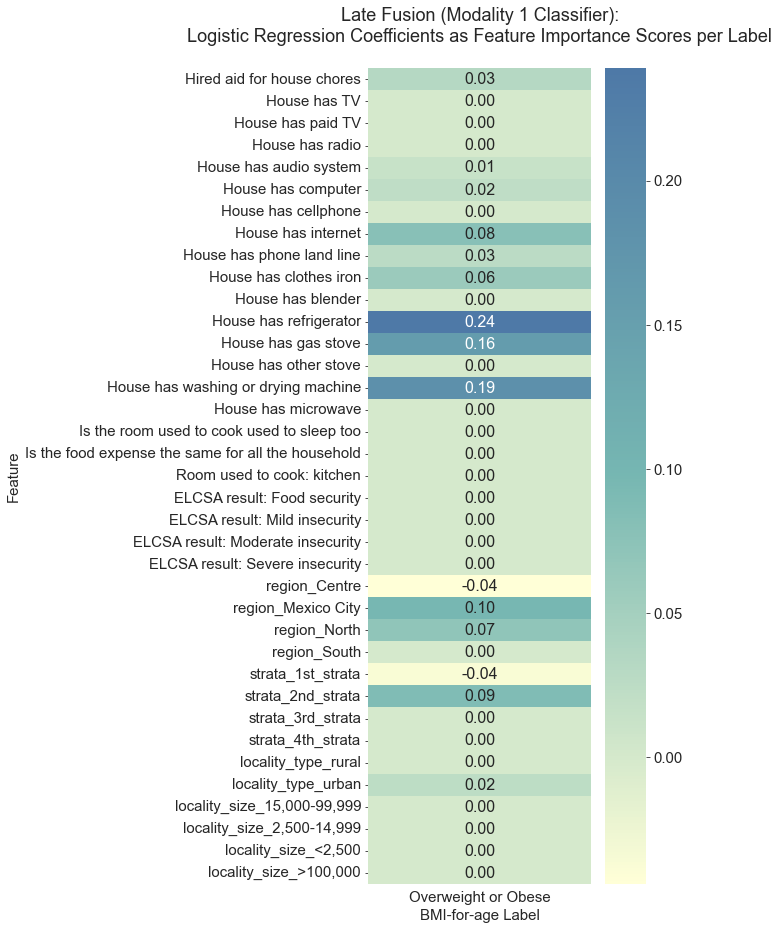

In [4]:
# Load data
train_m1_df = pd.read_csv(os.path.join(input_path, 'train_m1_encoded_df.csv'))
feat = list(train_m1_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','mod_elastic_net_m1.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_m1, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m1.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m1_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(5,15))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_m1_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 1 Classifier):
Logistic Regression Coefficients as Feature Importance Scores per Label
""")
plt.savefig(os.path.join(output_path,'others','m1_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [5]:
coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)

,Overweight or Obese
House has refrigerator,0.238948
House has washing or drying machine,0.186439
House has gas stove,0.159804
region_Mexico City,0.096600
strata_2nd_strata,0.087357
House has internet,0.079678
region_North,0.070123
House has clothes iron,0.059286
Hired aid for house chores,0.032776
House has phone land line,0.026549


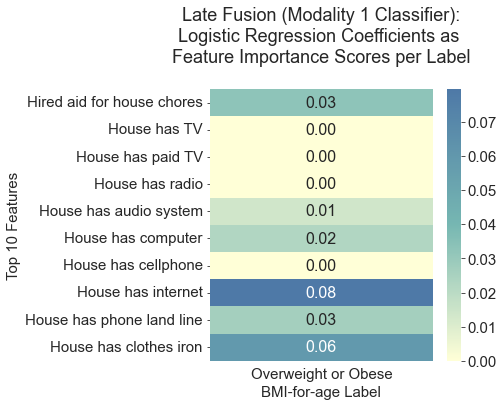

In [6]:
# Keep only the first 10 top features
top_10_features = coef_df.head(10)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(5,5))
sns.heatmap(top_10_features, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Top 10 Features')
plt.savefig(os.path.join(output_path,'others','report_m1_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 1 Classifier):
Logistic Regression Coefficients as 
Feature Importance Scores per Label
""")
plt.savefig(os.path.join(output_path,'others','m1_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [7]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_label = {}
n = 5
for c in data.columns:
    top_features_per_label[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_label.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

#data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_m1)
 
mask = np.array([[feat not in top_features_per_label[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'others','tmp','m1_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)



In [8]:
coef_df.sort_values(by=[1],axis=1, ascending=False)

KeyError: 1

In [ ]:
# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,22))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'others','report_m1_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 1 Classifier): 
          Top """ + str(n) + """ Most Important Features per BMI-for-age Label
          """)
plt.savefig(os.path.join(output_path,'others','m1_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})